In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Function for hierarchical clustering of DEGs on a heatmap
def DEG_heatmap_hierarchical(genes_file_path, plot_name, gene_list):
    
    genes = pd.read_csv('/Users/emmafinburgh/20440_Project/CSV_files/duplicate_genes.csv')
    logfold_changes_df = pd.read_csv(genes_file_path)
    # List of genes you want to plot
    genes_list = list(genes[gene_list])

    # Filter log-fold changes DataFrame based on genes list
    filtered_df = logfold_changes_df[logfold_changes_df['gene'].isin(genes_list)]
    # Set 'Gene' column as index
    pivoted_df = filtered_df.pivot(index='gene', columns='cell_type')
 
    # Keep only rows with less than or equal to 10 NaN values
    cell_types_to_keep = ['ASC', 'OLG', 'MG','mNEUR','OPC','PC','EC','EPC']
    df_filtered = pivoted_df['avg_log2FC']
    df_filtered_cells = df_filtered[cell_types_to_keep]
    nan_count = df_filtered_cells.isnull().sum(axis=1)
    df_filtered_nan = df_filtered_cells[nan_count < 10]

    df_filtered_nan.fillna(0, inplace=True)
    
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_filtered_nan)
    df_scaled = pd.DataFrame(scaled_data, index=df_filtered_nan.index, columns=df_filtered_nan.columns)

    plt.figure(figsize=(5, 12))  # Adjust the height of the heatmap
    clustered_data = sns.clustermap(df_scaled, cmap='coolwarm', vmin=-4, vmax=4, figsize=(5, 12),
                                    row_cluster=True, col_cluster=False)
    
    # Adjust font size of gene labels
    for tick_label in clustered_data.ax_heatmap.get_yticklabels():
        tick_label.set_fontsize(8)  # Adjust font size as needed
        

    plt.savefig(f'/Users/emmafinburgh/20440_Project/Figures/{plot_name}.png', dpi=300)
    plt.show()
    
    

<Figure size 500x1200 with 0 Axes>

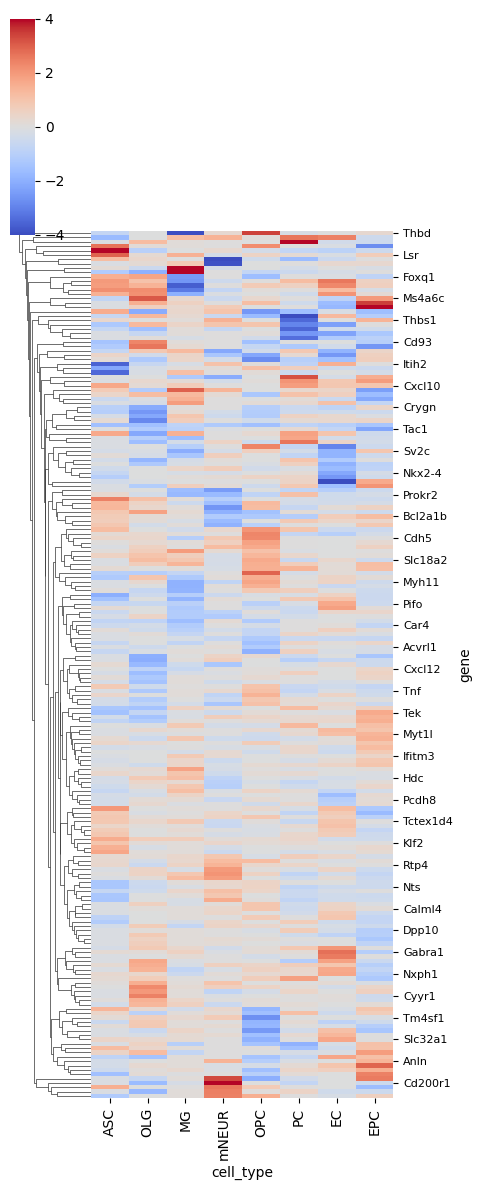

<Figure size 500x1200 with 0 Axes>

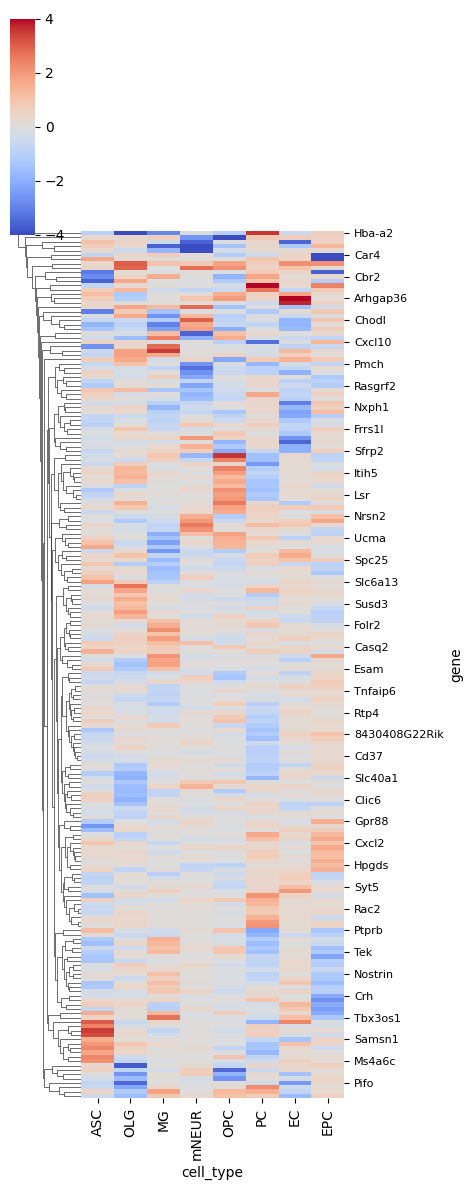

In [3]:
# Specify file paths, plot names, and genes list
file_paths = ["/Users/emmafinburgh/20440_Project/CSV_files/output_Old_vs_Young.csv", "/Users/emmafinburgh/20440_Project/CSV_files/output_CMS_ctrl_vs_baseline_ctrl.csv"]
plot_names = ["Old_Young_heatmap_all", "CMS_baseline_heatmap_all"]
genes_list = "Duplicate_genes"

# Plot DGE heatmaps for each comparison
for path, name in zip(file_paths, plot_names):
    DEG_heatmap_hierarchical(path, name, genes_list)

In [13]:
# Function for producing a DEG heatmap
def DEG_heatmap(genes_file_path, plot_name, gene_list):
    
    genes = pd.read_csv('/Users/emmafinburgh/20440_Project/CSV_files/duplicate_genes.csv')
    logfold_changes_df = pd.read_csv(genes_file_path)
    # List of genes you want to plot
    genes_list = list(genes[gene_list])

    # Filter log-fold changes DataFrame based on genes list
    filtered_df = logfold_changes_df[logfold_changes_df['gene'].isin(genes_list)]
    # Set 'Gene' column as index
    pivoted_df = filtered_df.pivot(index='gene', columns='cell_type')
 
    # Keep only rows with less than or equal to 10 NaN values
    cell_types_to_keep = ['ASC', 'OLG', 'MG','mNEUR','OPC','PC','EC','EPC']
    df_filtered = pivoted_df['avg_log2FC']
    df_filtered_cells = df_filtered[cell_types_to_keep]
    nan_count = df_filtered_cells.isnull().sum(axis=1)
    df_filtered_nan = df_filtered_cells[nan_count < 10]

    df_filtered_nan.fillna(0, inplace=True)
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_filtered_nan)
    df_scaled = pd.DataFrame(scaled_data, index=df_filtered_nan.index, columns=df_filtered_nan.columns)
      
    # Plot heatmap
    plt.figure(figsize=(5, 9))
    sns.heatmap(df_scaled, cmap='coolwarm', vmin=-5, vmax=5)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    plt.savefig(f'/Users/emmafinburgh/20440_Project/Figures/{plot_name}.png', dpi=300)
    plt.show()

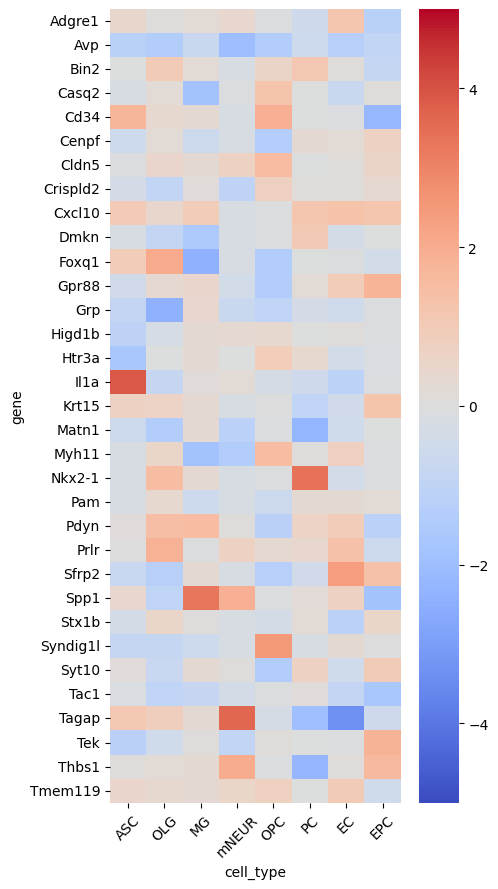

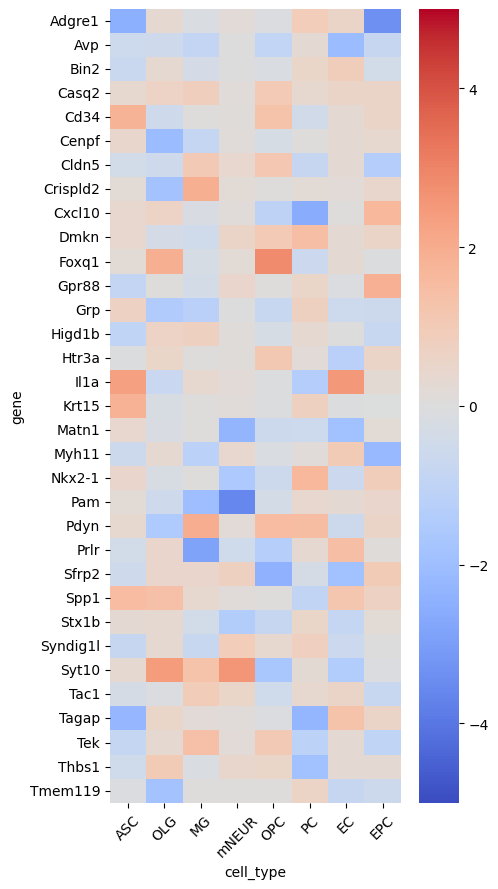

In [15]:
# Specify file paths, plot names, and genes list
file_paths = ["/Users/emmafinburgh/20440_Project/CSV_files/output_Old_vs_Young.csv",
              "/Users/emmafinburgh/20440_Project/CSV_files/output_CMS_ctrl_vs_baseline_ctrl.csv"]
plot_names = ["Old_Young_heatmap_consistent", "CMS_baseline_heatmap_consistent"]

strict_genes_list = "Duplicate_consistent"

for path, name in zip(file_paths, plot_names):
    DEG_heatmap(path, name, strict_genes_list)

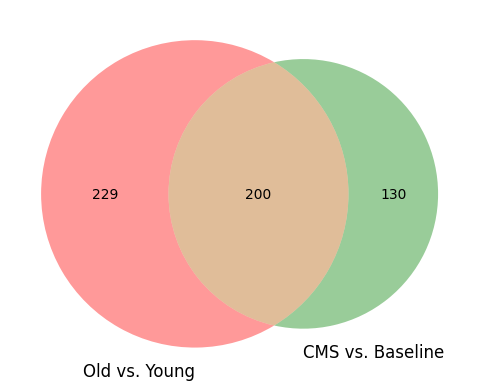

In [144]:
# Make venn diagram of overlapping gene counts
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the sets
set1_size = 229
set2_size = 130
overlap_size = 200

# Define the colors of the circles
circle1_color = 'red'
circle2_color = 'green'

# Create the Venn diagram with custom colors
venn = venn2(subsets=(set1_size, set2_size, overlap_size), set_labels=('Old vs. Young', 'CMS vs. Baseline'),
             set_colors=(circle1_color, circle2_color))

# Add values to the circles
venn.get_label_by_id('10').set_text(f'{set1_size}')
venn.get_label_by_id('01').set_text(f'{set2_size}')
venn.get_label_by_id('11').set_text(f'{overlap_size}')

# Save figure
plt.savefig(f'/Users/emmafinburgh/20440_Project/Figures/gene_venn_diagram.png', dpi=300)

# Show the plot
plt.show()